In [7]:
"""
Created on Tue May 24 13:23:13 2023

@author: Guido Pagano
Compute the time evolution of the ising coulping with a complete Hamiltonian and
compare the result under a pure spin interaction approximation
"""
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import Qsim.operator.spin as spin
import Qsim.operator.phonon as phon
import Qsim.ion_chain.ising.ising_ps as iscp
import Qsim.ion_chain.ising.ising_c as iscc
import Qsim.ion_chain.transfer.exci_operators as exop
from  Qsim.ion_chain.ion_system import *
from scipy import signal

In [8]:
'''set parameters of the system'''    
ion_sys = ions()
N = 3
ion_sys.N = N # 2 ion system 
ion_sys.fz = 1.1; #axial COM (Confining) frequency MHz
ion_sys.fx= 3.18; #transverse COM (Confining) frequency MHz
ion_sys.fr  = 12 #side band rabi frequency kHz
ion_sys.fb  = 12 
ion_sys.active_phonon = [[0,1,2]] # phonons active
ion_sys.pcut = [[3,3,3]] # phonon cutoffs
#delta = float(input("Enter detuning frequency (kHz): "))
ion_sys.delta_ref = 0 #detuning from com
delta = 30 #detuning from com mode
ion_sys.delta = delta
ion_sys.df_laser = 1 #Coupled to Radial
ion_sys.laser_couple = [0,1,2] #laser coupled to all ions
ion_sys.list_para() #print parameters of the system
ion_sys.check_phonon()
Bz = 0 #Effective magnetic field

________________________________________________________________
********************Setup of the Trap************************
number of ions 3
axial COM (Confining) frequency  1.1  [MHz]
transverse COM (Confining) frequency  3.18 [MHz]
index of ions that couple to the laser field:  [0, 1, 2]
Axial vibrational eigenfrequency [1.1  1.91 2.65] MHz
Transverse(Radial) vibrational eigenfrequency [3.18 2.98 2.68] MHz
                                                                 
********************Parameters of Laser Drive************************
Vibrational degree of freedom couples to the laser: Transverse (Radial)
detuning delta (measured as deviation from transverseCOM freq 30  [kHz]
detuning from eigenfrequency [ 30.   226.31 525.15] kHz
detuning frequency index:  0
red side band rabi frequency  12  [kHz]
blue side band rabi frequency  12  [kHz]
Estimated spin-phonon coupling strength: 6.93  [kHz]
                                                                 
********************

In [9]:
'''
simulation for complete Hamiltonian
'''
#construct Hamiltonian 
Heff,arg0 = iscc.H_ord(Bz,ion_sys) #construct time-dependent H
#construct initial state (0,0 = up up)
spin_config = spin.spin_state(N,[1,1,1])
#spin_config = [1,1,1]
print(spin_config)
psi1 = exop.ini_state(ion_sys,spin_config,[[0,0,0]],1)
elist1 = []
for i in range(N): elist1.append( tensor(spin.sz(N,i),exop.p_I(ion_sys)) )
psi1

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


Quantum object: dims = [[2, 2, 2, 3, 3, 3], [1, 1, 1, 1, 1, 1]], shape = (216, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]


In [10]:
#solve time dependent SE
times =  np.arange(0,5,10**(-4))
print('______________________________________________________________________')
print('solving for complete Hamiltonian')
complete = sesolve(Heff,psi1,times,e_ops=elist1,args = arg0,progress_bar=True,options=Options(nsteps=1000)) 

______________________________________________________________________
solving for complete Hamiltonian
10.0%. Run time:   4.35s. Est. time left: 00:00:00:39
20.0%. Run time:   8.61s. Est. time left: 00:00:00:34
30.0%. Run time:  12.88s. Est. time left: 00:00:00:30
40.0%. Run time:  17.23s. Est. time left: 00:00:00:25
50.0%. Run time:  21.56s. Est. time left: 00:00:00:21
60.0%. Run time:  25.87s. Est. time left: 00:00:00:17
70.0%. Run time:  30.17s. Est. time left: 00:00:00:12
80.0%. Run time:  34.42s. Est. time left: 00:00:00:08
90.0%. Run time:  38.64s. Est. time left: 00:00:00:04
Total run time:  42.86s


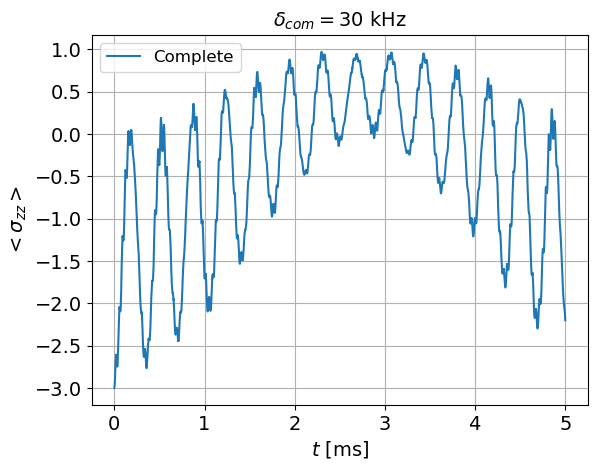

In [11]:
p1 = sum(complete.expect)
plt.plot(times,p1,label = 'Complete')
plt.xlabel(r'$t$ [ms]',fontsize = 14)
title = r'$\delta_{com} = $'+str(delta)+' kHz'
plt.ylabel(r'$<\sigma_{zz}>$',fontsize = 14)
plt.title(title,fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.legend(fontsize = 12)
plt.grid()

3
[[0.         0.74693703 0.65755317]
 [0.74693703 0.         0.74693703]
 [0.65755317 0.74693703 0.        ]]


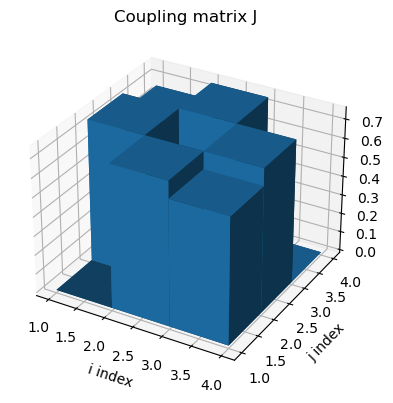

In [12]:
'''simulation with a pure spin approximation'''
print(ion_sys.df_spin())
psi0 = spin.phid(N)
psi0 = spin.spin_state(3,[1,1,1])
ion_sys.N
J = iscp.Jt(ion_sys)
print(J)
iscp.plotj(J)

In [13]:
elist2 = []
for i in range(N): elist2.append( spin.sz(N,i) )
H = iscp.Hps(J,ion_sys,Bz)
print('______________________________________________________________________')
print('solving for pure spin interaction')
spinres = mesolve(H,psi0,times,e_ops=elist2,progress_bar=True, options=Options(nsteps=1000))

______________________________________________________________________
solving for pure spin interaction
10.0%. Run time:   0.28s. Est. time left: 00:00:00:02
20.0%. Run time:   0.55s. Est. time left: 00:00:00:02
30.0%. Run time:   0.84s. Est. time left: 00:00:00:01
40.0%. Run time:   1.11s. Est. time left: 00:00:00:01
50.0%. Run time:   1.38s. Est. time left: 00:00:00:01
60.0%. Run time:   1.66s. Est. time left: 00:00:00:01
70.0%. Run time:   1.92s. Est. time left: 00:00:00:00
80.0%. Run time:   2.21s. Est. time left: 00:00:00:00
90.0%. Run time:   2.49s. Est. time left: 00:00:00:00
Total run time:   2.77s


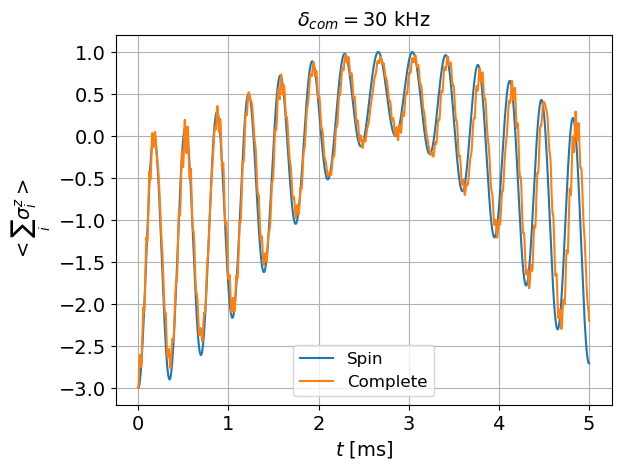

In [14]:
p2 = sum(spinres.expect)
title = r'$\delta_{com} = $'+str(delta)+' kHz'
plt.plot(times,p2,label = 'Spin')
plt.plot(times,p1,label = 'Complete')
plt.xlabel(r'$t$ [ms]',fontsize = 14)
plt.ylabel(r'$<\sum_i\sigma^z_{i}>$',fontsize = 14)
plt.title(title,fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.legend(fontsize = 12)
plt.grid()